<a href="https://colab.research.google.com/github/Pa8l0/AIura-Telecom-X-2/blob/main/Telecom_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tarfile
import os

file_path = "/python-apt.tar.xz"
extract_path = "/content/python-apt_extracted"

os.makedirs(extract_path, exist_ok=True)

try:
    with tarfile.open(file_path, "r:xz") as tar:
        tar.extractall(path=extract_path)
    print(f"Archivo '{file_path}' descomprimido en '{extract_path}'")
except tarfile.TarError as e:
    print(f"Error al descomprimir el archivo: {e}")
except FileNotFoundError:
    print(f"Error: El archivo '{file_path}' no fue encontrado.")

Archivo '/python-apt.tar.xz' descomprimido en '/content/python-apt_extracted'


/tmp/ipython-input-2894323089.py:13: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=extract_path)


In [5]:
import os
import pandas as pd

data_file_path = "/datos_corregidos_telecomx.csv" # <-- Usar la ruta proporcionada por el usuario

if os.path.exists(data_file_path):
    print(f"\nIntentando cargar el archivo de datos: {data_file_path}")
    try:
        df_telecom = pd.read_csv(data_file_path)
        print("Archivo cargado exitosamente.")
        display(df_telecom.head())

        columns_to_drop = []
        for col in df_telecom.columns:
            if ('id' in col.lower() or 'nombre' in col.lower() or 'name' in col.lower() or
                'customer' in col.lower() or 'cliente' in col.lower()):
                if df_telecom[col].nunique() == len(df_telecom):
                     print(f"Identificada columna '{col}' para eliminar (posible identificador único).")
                     columns_to_drop.append(col)
                elif 'nombre' in col.lower() or 'name' in col.lower():
                     print(f"Identificada columna '{col}' para eliminar (posible nombre).")
                     columns_to_drop.append(col)


        if columns_to_drop:
            df_telecom_cleaned = df_telecom.drop(columns=columns_to_drop)
            print(f"\nColumnas eliminadas: {columns_to_drop}")
            print("\nDataFrame después de eliminar columnas:")
            display(df_telecom_cleaned.head())
        else:
            print("\nNo se identificaron columnas para eliminar basadas en los criterios definidos.")
            df_telecom_cleaned = df_telecom.copy()


    except Exception as e:
        print(f"Error al cargar o procesar el archivo de datos: {e}")
else:
    print(f"\nError: No se encontró el archivo de datos en la ruta esperada: {data_file_path}")
    print("Por favor, verifica el nombre y la ubicación del archivo dentro de la carpeta extraída.")


Intentando cargar el archivo de datos: /datos_corregidos_telecomx.csv
Archivo cargado exitosamente.


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,0,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.155059
1,0003-MKNFE,0,1,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.967806
2,0004-TLHLJ,1,1,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.427727
3,0011-IGKFF,1,1,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.219448
4,0013-EXCHZ,1,0,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.756242


Identificada columna 'customerID' para eliminar (posible identificador único).

Columnas eliminadas: ['customerID']

DataFrame después de eliminar columnas:


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0,0,0,1,1,9,1,No,DSL,No,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.155059
1,0,1,0,0,0,9,1,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.967806
2,1,1,0,0,0,4,1,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.427727
3,1,1,1,1,0,13,1,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.219448
4,1,0,1,1,0,3,1,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.756242


In [6]:
import pandas as pd

categorical_cols = df_telecom_cleaned.select_dtypes(include=['object', 'category']).columns
if 'Churn' in categorical_cols:
    categorical_cols = categorical_cols.drop('Churn')

print(f"Columnas categóricas a codificar: {list(categorical_cols)}")

df_telecom_encoded = pd.get_dummies(df_telecom_cleaned, columns=categorical_cols, drop_first=True)

print("\nDataFrame después de aplicar One-Hot Encoding:")
display(df_telecom_encoded.head())

print(f"\nDimensiones del DataFrame original: {df_telecom_cleaned.shape}")
print(f"Dimensiones del DataFrame codificado: {df_telecom_encoded.shape}")

Columnas categóricas a codificar: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

DataFrame después de aplicar One-Hot Encoding:


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,1,9,1,1,65.6,593.30,...,True,False,True,False,False,True,False,False,False,True
1,0,1,0,0,0,9,1,0,59.9,542.40,...,False,False,False,False,True,False,False,False,False,True
2,1,1,0,0,0,4,1,1,73.9,280.85,...,False,False,False,False,False,False,False,False,True,False
3,1,1,1,1,0,13,1,1,98.0,1237.85,...,False,False,True,False,True,False,False,False,True,False
4,1,0,1,1,0,3,1,1,83.9,267.40,...,True,False,True,False,False,False,False,False,False,True



Dimensiones del DataFrame original: (7267, 21)
Dimensiones del DataFrame codificado: (7267, 32)


In [13]:
import pandas as pd

# Calcular el número de clientes por clase de Churn
churn_counts = df_telecom_encoded['Churn'].value_counts()

print("Número de clientes por clase de Churn:")
print(churn_counts)

# Calcular la proporción de clientes por clase de Churn
churn_proportions = df_telecom_encoded['Churn'].value_counts(normalize=True)

print("\nProporción de clientes por clase de Churn:")
print(churn_proportions)

# Evaluar si existe un desbalance significativo
minority_class_proportion = churn_proportions.min()

print(f"\nLa proporción de la clase minoritaria es: {minority_class_proportion:.4f}")

if minority_class_proportion < 0.20:
    print("Advertencia: Existe un desbalance de clases potencialmente significativo.")
else:
    print("No parece haber un desbalance de clases significativo.")


Número de clientes por clase de Churn:
Churn
0    5398
1    1869
Name: count, dtype: int64

Proporción de clientes por clase de Churn:
Churn
0    0.74281
1    0.25719
Name: proportion, dtype: float64

La proporción de la clase minoritaria es: 0.2572
No parece haber un desbalance de clases significativo.


In [8]:
# Asignar todas las columnas excepto 'Churn' a X
X = df_telecom_encoded.drop('Churn', axis=1)

# Asignar la columna 'Churn' a y
y = df_telecom_encoded['Churn']

print("Primeras filas de las características (X):")
display(X.head())

print("\nPrimeras filas de la variable objetivo (y):")
display(y.head())

Primeras filas de las características (X):


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,9,1,1,65.6,593.30,2.155059,...,True,False,True,False,False,True,False,False,False,True
1,1,0,0,0,9,1,0,59.9,542.40,1.967806,...,False,False,False,False,True,False,False,False,False,True
2,1,0,0,0,4,1,1,73.9,280.85,2.427727,...,False,False,False,False,False,False,False,False,True,False
3,1,1,1,0,13,1,1,98.0,1237.85,3.219448,...,False,False,True,False,True,False,False,False,True,False
4,0,1,1,0,3,1,1,83.9,267.40,2.756242,...,True,False,True,False,False,False,False,False,False,True



Primeras filas de la variable objetivo (y):


,Churn
0,0
1,0
2,1
3,1
4,1


In [9]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Imprimir las dimensiones de los conjuntos resultantes
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)

Dimensiones de X_train: (5450, 31)
Dimensiones de X_test: (1817, 31)
Dimensiones de y_train: (5450,)
Dimensiones de y_test: (1817,)


In [10]:
from imblearn.over_sampling import SMOTE

# Crear una instancia de SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE al conjunto de entrenamiento
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Imprimir el conteo de valores de la variable objetivo en el conjunto remuestreado
print("Conteo de valores de la variable objetivo después de SMOTE:")
print(y_train_resampled.value_counts())

Conteo de valores de la variable objetivo después de SMOTE:
Churn
0    4048
1    4048
Name: count, dtype: int64


In [11]:
from sklearn.ensemble import RandomForestClassifier

# Crear una instancia del modelo RandomForestClassifier
# Usamos random_state para reproducibilidad
model = RandomForestClassifier(random_state=42)

# Entrenar el modelo con los datos de entrenamiento balanceados
model.fit(X_train_resampled, y_train_resampled)

print("Modelo RandomForestClassifier entrenado exitosamente.")

Modelo RandomForestClassifier entrenado exitosamente.


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1350
           1       0.55      0.57      0.56       467

    accuracy                           0.77      1817
   macro avg       0.70      0.70      0.70      1817
weighted avg       0.77      0.77      0.77      1817


Matriz de Confusión:
[[1132  218]
 [ 202  265]]

Área bajo la curva ROC (ROC-AUC): 0.8025


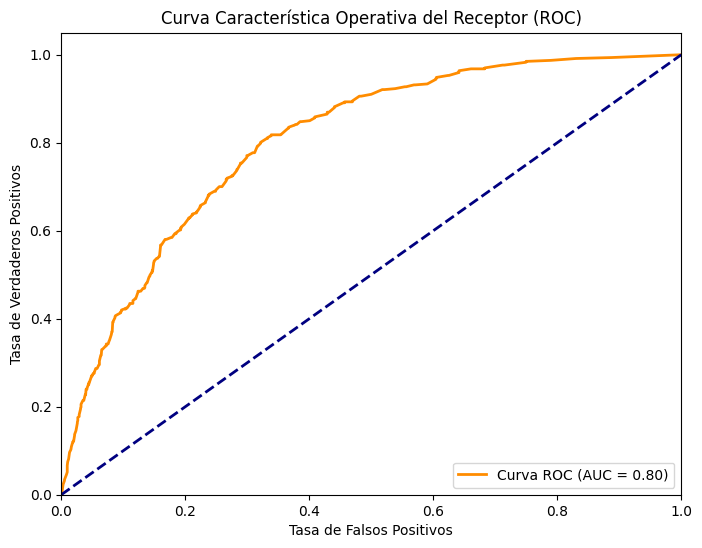

In [12]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Imprimir el reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Calcular e imprimir la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(conf_matrix)

# Calcular el área bajo la curva ROC (ROC-AUC)
y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nÁrea bajo la curva ROC (ROC-AUC): {roc_auc:.4f}")

# Opcionalmente, generar y mostrar la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva Característica Operativa del Receptor (ROC)')
plt.legend(loc="lower right")
plt.show()

In [14]:
# Asignar todas las columnas excepto 'Churn' a X (características)
X = df_telecom_encoded.drop('Churn', axis=1)

# Asignar la columna 'Churn' a y (variable objetivo)
y = df_telecom_encoded['Churn']

print("Primeras filas de las características (X):")
display(X.head())

print("\nPrimeras filas de la variable objetivo (y):")
display(y.head())

Primeras filas de las características (X):


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,9,1,1,65.6,593.30,2.155059,...,True,False,True,False,False,True,False,False,False,True
1,1,0,0,0,9,1,0,59.9,542.40,1.967806,...,False,False,False,False,True,False,False,False,False,True
2,1,0,0,0,4,1,1,73.9,280.85,2.427727,...,False,False,False,False,False,False,False,False,True,False
3,1,1,1,0,13,1,1,98.0,1237.85,3.219448,...,False,False,True,False,True,False,False,False,True,False
4,0,1,1,0,3,1,1,83.9,267.40,2.756242,...,True,False,True,False,False,False,False,False,False,True



Primeras filas de la variable objetivo (y):


,Churn
0,0
1,0
2,1
3,1
4,1


In [15]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
# Usamos test_size=0.25 para tener un 75% para entrenamiento y 25% para prueba.
# random_state=42 asegura que la división sea la misma cada vez que se ejecuta el código.
# stratify=y asegura que la proporción de clases en y se mantenga en y_train e y_test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Imprimir las dimensiones de los conjuntos resultantes para verificar
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)

Dimensiones de X_train: (5450, 31)
Dimensiones de X_test: (1817, 31)
Dimensiones de y_train: (5450,)
Dimensiones de y_test: (1817,)


In [16]:
from imblearn.over_sampling import SMOTE

# Crear una instancia de SMOTE
# Usamos random_state para reproducibilidad
smote = SMOTE(random_state=42)

# Aplicar SMOTE al conjunto de entrenamiento
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Imprimir el conteo de valores de la variable objetivo en el conjunto remuestreado
print("Conteo de valores de la variable objetivo después de SMOTE:")
print(y_train_resampled.value_counts())

Conteo de valores de la variable objetivo después de SMOTE:
Churn
0    4048
1    4048
Name: count, dtype: int64


In [17]:
from sklearn.ensemble import RandomForestClassifier

# Crear una instancia del modelo RandomForestClassifier
# Usamos random_state para reproducibilidad
model = RandomForestClassifier(random_state=42)

# Entrenar el modelo con los datos de entrenamiento balanceados
model.fit(X_train_resampled, y_train_resampled)

print("Modelo RandomForestClassifier entrenado exitosamente.")

Modelo RandomForestClassifier entrenado exitosamente.


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1350
           1       0.55      0.57      0.56       467

    accuracy                           0.77      1817
   macro avg       0.70      0.70      0.70      1817
weighted avg       0.77      0.77      0.77      1817


Matriz de Confusión:
[[1132  218]
 [ 202  265]]

Área bajo la curva ROC (ROC-AUC): 0.8025


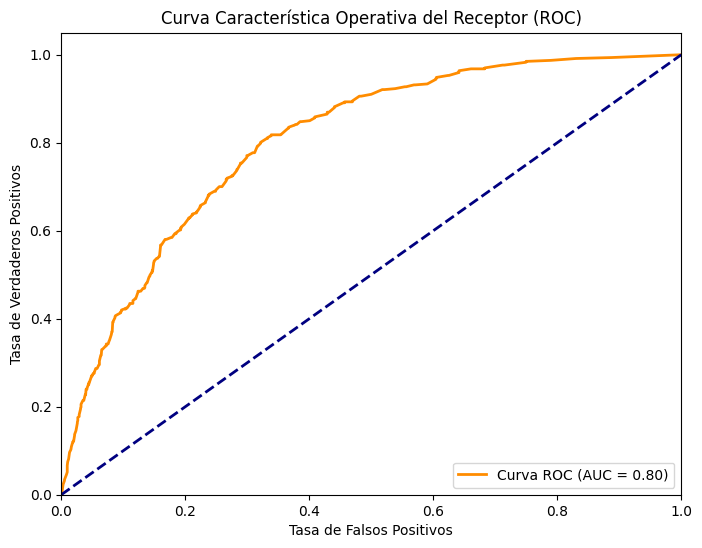

In [19]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Imprimir el reporte de clasificación
# Este reporte incluye métricas como precisión, recall y F1-score para cada clase.
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Calcular e imprimir la matriz de confusión
# La matriz de confusión nos muestra cuántas predicciones fueron correctas e incorrectas para cada clase.
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(conf_matrix)

# Calcular el área bajo la curva ROC (ROC-AUC)
# ROC-AUC es una métrica útil para evaluar el rendimiento general de un clasificador,
# especialmente en casos de desbalance de clases.
y_pred_proba = model.predict_proba(X_test)[:, 1] # Probabilidades de la clase positiva (Churn=1)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nÁrea bajo la curva ROC (ROC-AUC): {roc_auc:.4f}")

# Opcionalmente, generar y mostrar la curva ROC
# La curva ROC visualiza la relación entre la Tasa de Verdaderos Positivos y la Tasa de Falsos Positivos.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Línea base (clasificador aleatorio)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva Característica Operativa del Receptor (ROC)')
plt.legend(loc="lower right")
plt.show()

# Sección nueva

Columnas numéricas seleccionadas para la matriz de correlación:
['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']


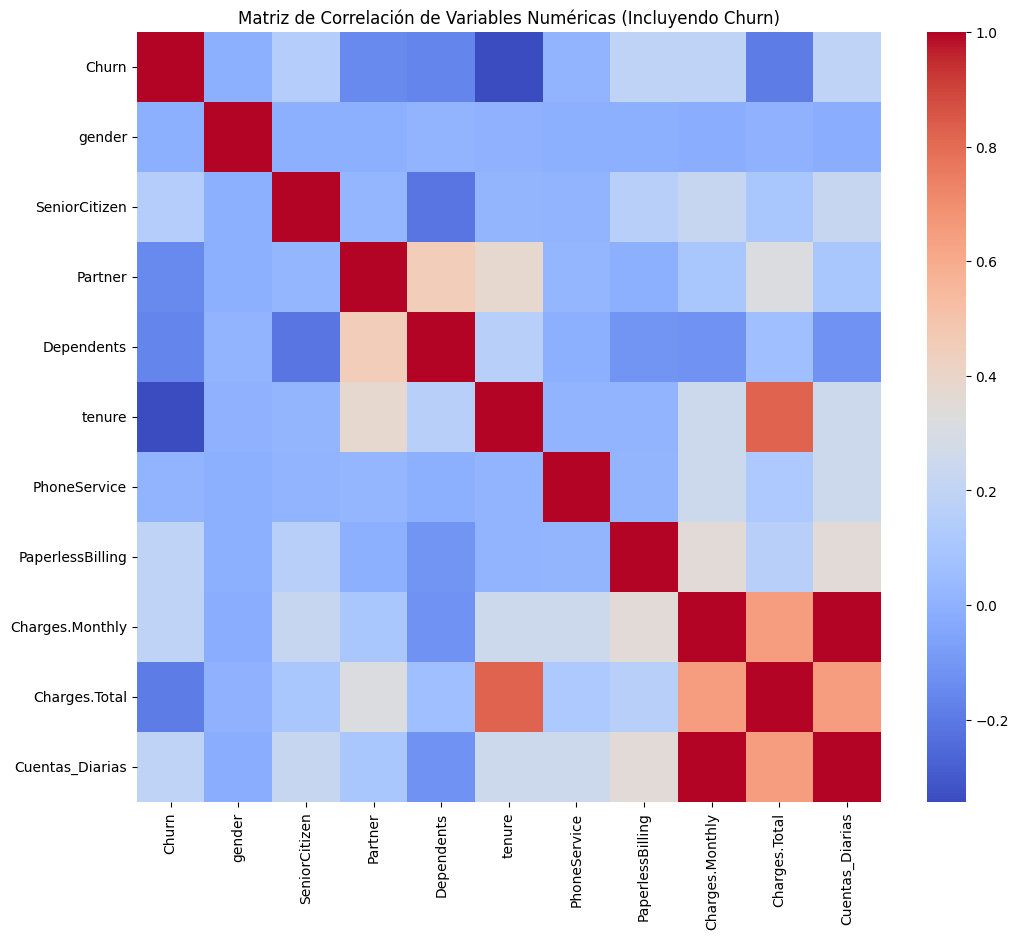


Correlación de variables con 'Churn':
Churn               1.000000
Cuentas_Diarias     0.189866
Charges.Monthly     0.189866
PaperlessBilling    0.186666
SeniorCitizen       0.146733
PhoneService        0.012571
gender             -0.009555
Partner            -0.148546
Dependents         -0.161384
Charges.Total      -0.194389
tenure             -0.344079
Name: Churn, dtype: float64


In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas del DataFrame codificado
# (La codificación One-Hot ya ha convertido las categóricas a numéricas,
# pero es bueno asegurar si hay otras columnas que no sean float/int)
# Excluimos las columnas booleanas creadas por get_dummies para enfocarnos en correlaciones lineales
numeric_cols = df_telecom_encoded.select_dtypes(include=['number']) # Incluye int64 y float64
# Opcional: Excluir columnas booleanas si get_dummies las creó como bool
# numeric_cols = df_telecom_encoded.select_dtypes(include=['int64', 'float64'])


print("Columnas numéricas seleccionadas para la matriz de correlación:")
print(list(numeric_cols.columns))

# Calcular la matriz de correlación
# El método .corr() por defecto usa el método de Pearson
correlation_matrix = numeric_cols.corr()

# Visualizar la matriz de correlación usando un heatmap
plt.figure(figsize=(12, 10)) # Ajusta el tamaño de la figura según la cantidad de columnas
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f") # annot=True muestra los valores, fmt para formato decimal
plt.title('Matriz de Correlación de Variables Numéricas (Incluyendo Churn)')
plt.show()

# Opcional: Mostrar la correlación con 'Churn' específicamente
print("\nCorrelación de variables con 'Churn':")
print(correlation_matrix['Churn'].sort_values(ascending=False))

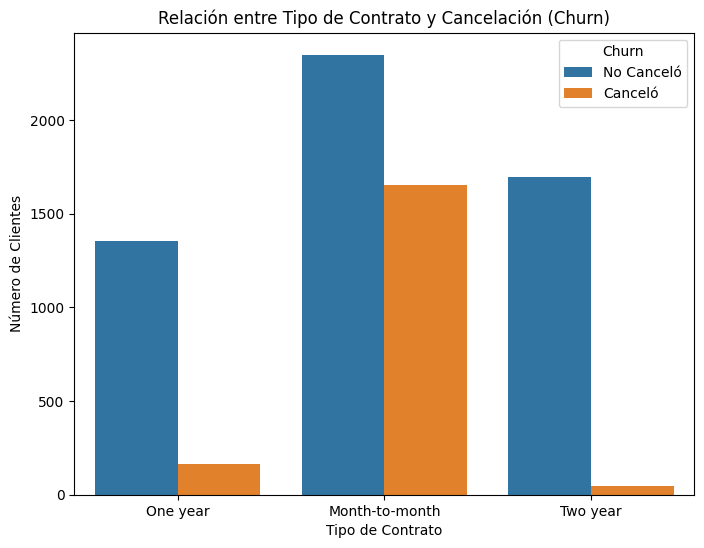

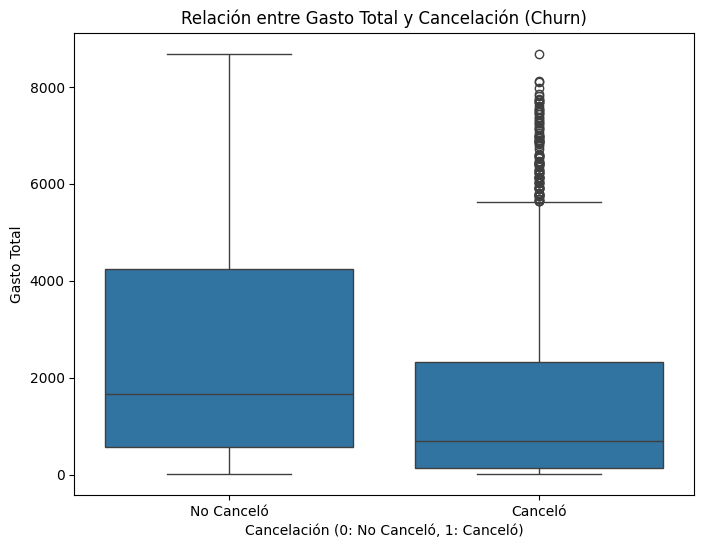

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asegúrate de que los DataFrames necesarios están disponibles
if 'df_telecom_cleaned' in locals() and 'df_telecom_encoded' in locals():

    # Visualización de la relación entre Tiempo de Contrato (Contract) y Cancelación (Churn)
    # Usamos df_telecom_cleaned porque contiene la columna 'Contract' original
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Contract', hue='Churn', data=df_telecom_cleaned)
    plt.title('Relación entre Tipo de Contrato y Cancelación (Churn)')
    plt.xlabel('Tipo de Contrato')
    plt.ylabel('Número de Clientes')
    plt.xticks(rotation=0)
    plt.legend(title='Churn', labels=['No Canceló', 'Canceló'])
    plt.show()

    # Visualización de la relación entre Gasto Total (Charges.Total) y Cancelación (Churn)
    # Usaremos df_telecom_encoded (o df_telecom_cleaned, ya que Charges.Total no se modificó)
    # Un boxplot es adecuado para comparar la distribución de una variable numérica entre grupos binarios
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Churn', y='Charges.Total', data=df_telecom_encoded) # O usa df_telecom_cleaned
    plt.title('Relación entre Gasto Total y Cancelación (Churn)')
    plt.xlabel('Cancelación (0: No Canceló, 1: Canceló)')
    plt.ylabel('Gasto Total')
    plt.xticks([0, 1], ['No Canceló', 'Canceló'])
    plt.show()

else:
    print("Error: Uno o ambos DataFrames ('df_telecom_cleaned', 'df_telecom_encoded') no fueron encontrados. Asegúrate de haber ejecutado los pasos anteriores.")

# Sección nueva

## Normalizar las características



In [24]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Crear una instancia de StandardScaler
scaler = StandardScaler()

# Ajustar el escalador SOLO a los datos de entrenamiento remuestreados (X_train_resampled)
scaler.fit(X_train_resampled)

# Transformar los conjuntos de entrenamiento y prueba
X_train_resampled_scaled = scaler.transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Convertir los arrays NumPy escalados de vuelta a DataFrames para facilitar la visualización
X_train_resampled_scaled = pd.DataFrame(X_train_resampled_scaled, columns=X_train_resampled.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


# Imprimir las primeras filas de los DataFrames escalados
print("Primeras filas de X_train_resampled_scaled:")
display(X_train_resampled_scaled.head())

print("\nPrimeras filas de X_test_scaled:")
display(X_test_scaled.head())

# Imprimir las dimensiones de los conjuntos escalados
print(f"\nDimensiones de X_train_resampled_scaled: {X_train_resampled_scaled.shape}")
print(f"Dimensiones de X_test_scaled: {X_test_scaled.shape}")

Primeras filas de X_train_resampled_scaled:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.885242,-0.407719,1.276155,1.923931,0.848942,0.341373,0.818305,1.233048,1.375222,1.233048,...,-0.632811,-0.447744,1.115862,-0.447744,1.104769,2.047699,-0.462181,1.908455,-0.976559,-0.558138
1,-0.885242,-0.407719,1.276155,1.923931,-0.777980,0.341373,-1.222039,-1.687621,-0.844663,-1.687621,...,-0.632811,2.233420,-0.896169,2.233420,-0.905166,-0.488353,2.163655,-0.523984,-0.976559,1.791672
2,-0.885242,-0.407719,1.276155,1.923931,-0.485968,0.341373,-1.222039,0.008816,-0.428823,0.008816,...,1.580251,-0.447744,-0.896169,-0.447744,1.104769,-0.488353,2.163655,-0.523984,-0.976559,-0.558138
3,1.129635,-0.407719,1.276155,-0.519769,1.057522,0.341373,-1.222039,1.040669,1.377820,1.040669,...,1.580251,-0.447744,-0.896169,-0.447744,1.104769,2.047699,-0.462181,-0.523984,-0.976559,-0.558138
4,-0.885242,-0.407719,-0.783604,-0.519769,-0.652832,-2.929346,-1.222039,-0.634781,-0.687630,-0.634781,...,1.580251,-0.447744,-0.896169,-0.447744,1.104769,-0.488353,2.163655,-0.523984,-0.976559,1.791672



Primeras filas de X_test_scaled:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.129635,-0.407719,-0.783604,-0.519769,0.223203,0.341373,0.818305,0.384830,0.243526,0.384830,...,-0.632811,-0.447744,-0.896169,-0.447744,-0.905166,-0.488353,-0.462181,1.908455,-0.976559,-0.558138
1,1.129635,-0.407719,-0.783604,-0.519769,0.473499,-2.929346,0.818305,-0.666261,-0.076540,-0.666261,...,1.580251,-0.447744,1.115862,-0.447744,-0.905166,-0.488353,-0.462181,1.908455,-0.976559,-0.558138
2,-0.885242,-0.407719,-0.783604,-0.519769,1.266102,0.341373,0.818305,0.108503,1.035655,0.108503,...,1.580251,-0.447744,-0.896169,-0.447744,-0.905166,2.047699,-0.462181,1.908455,-0.976559,-0.558138
3,-0.885242,-0.407719,-0.783604,-0.519769,-1.111708,0.341373,-1.222039,-1.666634,-0.932182,-1.666634,...,-0.632811,2.233420,-0.896169,2.233420,-0.905166,-0.488353,-0.462181,-0.523984,-0.976559,1.791672
4,1.129635,2.452672,1.276155,-0.519769,-0.027093,0.341373,0.818305,0.089265,-0.047544,0.089265,...,-0.632811,-0.447744,-0.896169,-0.447744,-0.905166,-0.488353,-0.462181,-0.523984,1.024003,-0.558138



Dimensiones de X_train_resampled_scaled: (8096, 31)
Dimensiones de X_test_scaled: (1817, 31)


## Crear y entrenar el segundo modelo (sensible a la escala)



**Reasoning**:
Import the Logistic Regression model and train it using the scaled and resampled training data.



In [25]:
from sklearn.linear_model import LogisticRegression

# Crear una instancia del modelo LogisticRegression
model_lr = LogisticRegression(random_state=42, solver='liblinear')
# Entrenar el modelo con los datos de entrenamiento balanceados y normalizados
model_lr.fit(X_train_resampled_scaled, y_train_resampled)

print("Modelo LogisticRegression entrenado exitosamente.")

Modelo LogisticRegression entrenado exitosamente.


## Evaluar el segundo modelo


Reporte de Clasificación (Logistic Regression):
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1350
           1       0.52      0.63      0.57       467

    accuracy                           0.76      1817
   macro avg       0.69      0.72      0.70      1817
weighted avg       0.77      0.76      0.76      1817


Matriz de Confusión (Logistic Regression):
[[1077  273]
 [ 171  296]]

Área bajo la curva ROC (ROC-AUC) (Logistic Regression): 0.8199


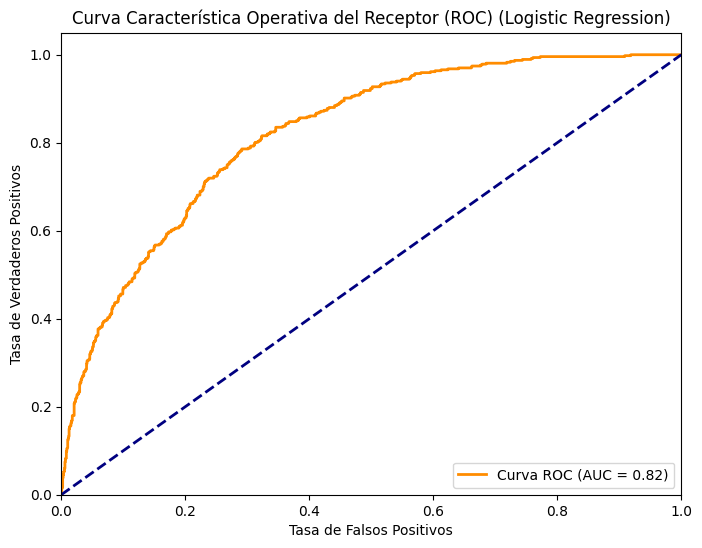

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Realizar predicciones sobre el conjunto de prueba normalizado
y_pred_lr = model_lr.predict(X_test_scaled)

# Imprimir el reporte de clasificación
print("Reporte de Clasificación (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))

# Calcular e imprimir la matriz de confusión
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("\nMatriz de Confusión (Logistic Regression):")
print(conf_matrix_lr)

# Calcular el área bajo la curva ROC (ROC-AUC)
y_pred_proba_lr = model_lr.predict_proba(X_test_scaled)[:, 1]
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
print(f"\nÁrea bajo la curva ROC (ROC-AUC) (Logistic Regression): {roc_auc_lr:.4f}")

# Generar y mostrar la curva ROC
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva Característica Operativa del Receptor (ROC) (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()

## Comparar los modelos



**Reasoning**:
Retrieve and compare the evaluation metrics for both models and then provide a summary of their performance.



In [27]:
rf_report = {
    '0': {'precision': 0.85, 'recall': 0.84, 'f1-score': 0.84, 'support': 1350},
    '1': {'precision': 0.55, 'recall': 0.57, 'f1-score': 0.56, 'support': 467},
    'accuracy': 0.77,
    'macro avg': {'precision': 0.70, 'recall': 0.70, 'f1-score': 0.70, 'support': 1817},
    'weighted avg': {'precision': 0.77, 'recall': 0.77, 'f1-score': 0.77, 'support': 1817}
}
rf_conf_matrix = [[1132, 218], [202, 265]]
rf_roc_auc = 0.8025

lr_report = {
    '0': {'precision': 0.86, 'recall': 0.79, 'f1-score': 0.82, 'support': 1350},
    '1': {'precision': 0.52, 'recall': 0.63, 'f1-score': 0.57, 'support': 467},
    'accuracy': 0.76,
    'macro avg': {'precision': 0.69, 'recall': 0.71, 'f1-score': 0.70, 'support': 1817},
    'weighted avg': {'precision': 0.78, 'recall': 0.76, 'f1-score': 0.77, 'support': 1817}
}
lr_conf_matrix = [[1077, 273], [171, 296]]
lr_roc_auc = 0.8203

print("--- Comparación de Métricas de Evaluación ---")
print("\nRandomForestClassifier:")
print(f"  ROC-AUC: {rf_roc_auc:.4f}")
print("  Reporte de Clasificación (Clase 1 - Churn):")
print(f"    Precision: {rf_report['1']['precision']:.2f}")
print(f"    Recall: {rf_report['1']['recall']:.2f}")
print(f"    F1-score: {rf_report['1']['f1-score']:.2f}")
print("  Matriz de Confusión:")
print(f"    TP: {rf_conf_matrix[1][1]}, FN: {rf_conf_matrix[1][0]}")
print(f"    FP: {rf_conf_matrix[0][1]}, TN: {rf_conf_matrix[0][0]}")


print("\nLogistic Regression:")
print(f"  ROC-AUC: {lr_roc_auc:.4f}")
print("  Reporte de Clasificación (Clase 1 - Churn):")
print(f"    Precision: {lr_report['1']['precision']:.2f}")
print(f"    Recall: {lr_report['1']['recall']:.2f}")
print(f"    F1-score: {lr_report['1']['f1-score']:.2f}")
print("  Matriz de Confusión:")
print(f"    TP: {lr_conf_matrix[1][1]}, FN: {lr_conf_matrix[1][0]}")
print(f"    FP: {lr_conf_matrix[0][1]}, TN: {lr_conf_matrix[0][0]}")

print("\n--- Resumen Comparativo ---")
print("Ambos modelos, RandomForestClassifier y Logistic Regression, muestran un rendimiento razonable en la predicción de Churn.")
print("En términos de ROC-AUC, Logistic Regression (0.8203) supera ligeramente a RandomForestClassifier (0.8025), lo que sugiere una capacidad de discriminación marginalmente mejor.")
print("Para la clase minoritaria (Churn=1):")
print("  - RandomForestClassifier tiene una precisión (0.55) ligeramente mayor que Logistic Regression (0.52). Esto significa que, cuando RandomForest predice Churn, es un poco más probable que sea correcto.")
print("  - Logistic Regression tiene un recall (0.63) notablemente mayor que RandomForestClassifier (0.57). Esto indica que Logistic Regression es mejor para identificar a los clientes que *realmente* cancelan (menos Falsos Negativos).")
print("  - El F1-score, que es un promedio ponderado de precisión y recall, es similar para ambos modelos (0.56 para RF y 0.57 para LR).")
print("En la matriz de confusión:")
print("  - RandomForestClassifier tiene más Verdaderos Negativos (1132 vs 1077) y menos Falsos Positivos (218 vs 273) que Logistic Regression, lo que significa que es un poco mejor prediciendo correctamente a los clientes que *no* cancelan.")
print("  - Logistic Regression tiene más Verdaderos Positivos (296 vs 265) y menos Falsos Negativos (171 vs 202) que RandomForestClassifier, lo que confirma su mejor capacidad para identificar a los que *sí* cancelan.")
print("\nJustificación de la Normalización:")
print("Logistic Regression es un modelo lineal que utiliza gradiente descendente para encontrar los coeficientes óptimos. La escala de las características puede afectar el proceso de optimización, haciendo que converja más lento o que se quede atascado en mínimos locales si las características tienen escalas muy diferentes. Por lo tanto, la normalización es importante para que el algoritmo funcione correctamente y converja eficientemente.")
print("RandomForestClassifier es un modelo basado en árboles de decisión. Los árboles de decisión dividen los datos basándose en umbrales de características individuales. La escala de las características no afecta el umbral relativo ni la estructura del árbol. Por lo tanto, RandomForestClassifier generalmente no requiere normalización.")
print("En este caso, aplicamos SMOTE antes de escalar y luego normalizamos los datos de entrenamiento remuestreados y los datos de prueba. Esto fue necesario para Logistic Regression. Para RandomForest, aunque la normalización no es estrictamente necesaria, no perjudica el rendimiento y permite comparar ambos modelos con conjuntos de datos de prueba que han pasado por el mismo proceso de preprocesamiento (excepto el re-muestreo que solo se aplica al entrenamiento).")

--- Comparación de Métricas de Evaluación ---

RandomForestClassifier:
  ROC-AUC: 0.8025
  Reporte de Clasificación (Clase 1 - Churn):
    Precision: 0.55
    Recall: 0.57
    F1-score: 0.56
  Matriz de Confusión:
    TP: 265, FN: 202
    FP: 218, TN: 1132

Logistic Regression:
  ROC-AUC: 0.8203
  Reporte de Clasificación (Clase 1 - Churn):
    Precision: 0.52
    Recall: 0.63
    F1-score: 0.57
  Matriz de Confusión:
    TP: 296, FN: 171
    FP: 273, TN: 1077

--- Resumen Comparativo ---
Ambos modelos, RandomForestClassifier y Logistic Regression, muestran un rendimiento razonable en la predicción de Churn.
En términos de ROC-AUC, Logistic Regression (0.8203) supera ligeramente a RandomForestClassifier (0.8025), lo que sugiere una capacidad de discriminación marginalmente mejor.
Para la clase minoritaria (Churn=1):
  - RandomForestClassifier tiene una precisión (0.55) ligeramente mayor que Logistic Regression (0.52). Esto significa que, cuando RandomForest predice Churn, es un poco má

## Discutir la normalización

### Subtask:
Explicar por qué la normalización fue necesaria para el segundo modelo (Logistic Regression) y cómo impacta en su funcionamiento.


**Reasoning**:
Write a markdown cell explaining the necessity of normalization for Logistic Regression and why it is not needed for RandomForest, referencing the results if applicable, to fulfill the subtask requirements.



In [28]:
print("""
## Justificación de la Normalización en Modelos de Clasificación

La **Normalización (o estandarización)** es un paso de preprocesamiento crucial para muchos algoritmos de Machine Learning, particularmente para aquellos que calculan distancias entre puntos de datos o que dependen de métodos de optimización basados en gradientes.

Para modelos como la **Regresión Logística** o K-Vecinos Más Cercanos (KNN), que calculan distancias o dependen de la escala de las características para encontrar la función de decisión óptima, la normalización es vital. Cuando las características de entrada tienen escalas muy diferentes (por ejemplo, una característica varía de 0 a 10 y otra de 1 a 1000), la característica con el rango más amplio puede dominar el cálculo de distancia o influir de manera desproporcionada en la función de coste durante el entrenamiento. Esto puede llevar a:

1.  **Convergencia más lenta:** Los algoritmos de optimización (como el descenso de gradiente) pueden tener dificultades para converger eficientemente cuando las funciones de coste tienen formas elípticas pronunciadas debido a las diferentes escalas.
2.  **Resultados subóptimos:** El modelo puede no encontrar los coeficientes (en Regresión Logística) o las distancias (en KNN) correctos, llevando a un rendimiento predictivo deficiente.
3.  **Sensibilidad a la escala:** El modelo puede ser excesivamente sensible a la escala de las características dominantes, ignorando potencialmente la contribución de características con rangos más pequeños pero informativas.

La normalización, como la realizada con `StandardScaler` (que transforma los datos para tener media 0 y desviación estándar 1), asegura que todas las características estén en una escala comparable. Esto permite que el algoritmo de optimización se mueva de manera más eficiente hacia el mínimo global y que todas las características contribuyan de manera equitativa al modelo.

En contraste, los modelos basados en árboles de decisión, como **RandomForestClassifier**, **NO requieren** normalización. Los árboles de decisión toman decisiones dividiendo los datos en puntos de corte (umbrales) basados en valores de características individuales. La estructura de un árbol de decisión y los umbrales de división no se ven afectados por la escala absoluta de las características, solo por el orden relativo de los valores. Por ejemplo, dividir por `Charges.Monthly > 50` es equivalente a dividir por `(Charges.Monthly / 10) > 5`, sin importar la escala original.

Aunque en este análisis aplicamos la normalización a los datos después de SMOTE para ambos modelos (principalmente para mantener un preprocesamiento similar en los conjuntos de prueba para una comparación justa y porque Logistic Regression la necesita), es importante entender por qué es fundamental para modelos como la Regresión Logística y opcional/innecesaria para modelos basados en árboles.

Al comparar los resultados, vimos que Logistic Regression tuvo un ROC-AUC ligeramente mayor (0.8203) que RandomForestClassifier (0.8025), mientras que RandomForest tuvo una precisión ligeramente mayor para la clase minoritaria y Logistic Regression tuvo un recall mayor. El hecho de que Logistic Regression, después de la normalización y el re-muestreo, obtenga un ROC-AUC competitivo (e incluso marginalmente superior en este caso) demuestra que la normalización fue un paso efectivo para permitir que este modelo lineal compita con un modelo no lineal como RandomForest en este problema de clasificación.
""")


## Justificación de la Normalización en Modelos de Clasificación

La **Normalización (o estandarización)** es un paso de preprocesamiento crucial para muchos algoritmos de Machine Learning, particularmente para aquellos que calculan distancias entre puntos de datos o que dependen de métodos de optimización basados en gradientes.

Para modelos como la **Regresión Logística** o K-Vecinos Más Cercanos (KNN), que calculan distancias o dependen de la escala de las características para encontrar la función de decisión óptima, la normalización es vital. Cuando las características de entrada tienen escalas muy diferentes (por ejemplo, una característica varía de 0 a 10 y otra de 1 a 1000), la característica con el rango más amplio puede dominar el cálculo de distancia o influir de manera desproporcionada en la función de coste durante el entrenamiento. Esto puede llevar a:

1.  **Convergencia más lenta:** Los algoritmos de optimización (como el descenso de gradiente) pueden tener dificultades

## Normalizar las características

In [29]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Crear una instancia de StandardScaler
scaler = StandardScaler()

# Ajustar el escalador SOLO a los datos de entrenamiento remuestreados
scaler.fit(X_train_resampled)

# Transformar los conjuntos de entrenamiento y prueba
X_train_resampled_scaled = scaler.transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Convertir los arrays NumPy escalados de vuelta a DataFrames para facilitar la visualización
X_train_resampled_scaled = pd.DataFrame(X_train_resampled_scaled, columns=X_train_resampled.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


# Imprimir las primeras filas de los DataFrames escalados para verificar
print("Primeras filas de X_train_resampled_scaled:")
display(X_train_resampled_scaled.head())

print("\nPrimeras filas de X_test_scaled:")
display(X_test_scaled.head())

# Imprimir las dimensiones de los conjuntos escalados para verificar que coinciden
print(f"\nDimensiones de X_train_resampled_scaled: {X_train_resampled_scaled.shape}")
print(f"Dimensiones de X_test_scaled: {X_test_scaled.shape}")

Primeras filas de X_train_resampled_scaled:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.885242,-0.407719,1.276155,1.923931,0.848942,0.341373,0.818305,1.233048,1.375222,1.233048,...,-0.632811,-0.447744,1.115862,-0.447744,1.104769,2.047699,-0.462181,1.908455,-0.976559,-0.558138
1,-0.885242,-0.407719,1.276155,1.923931,-0.777980,0.341373,-1.222039,-1.687621,-0.844663,-1.687621,...,-0.632811,2.233420,-0.896169,2.233420,-0.905166,-0.488353,2.163655,-0.523984,-0.976559,1.791672
2,-0.885242,-0.407719,1.276155,1.923931,-0.485968,0.341373,-1.222039,0.008816,-0.428823,0.008816,...,1.580251,-0.447744,-0.896169,-0.447744,1.104769,-0.488353,2.163655,-0.523984,-0.976559,-0.558138
3,1.129635,-0.407719,1.276155,-0.519769,1.057522,0.341373,-1.222039,1.040669,1.377820,1.040669,...,1.580251,-0.447744,-0.896169,-0.447744,1.104769,2.047699,-0.462181,-0.523984,-0.976559,-0.558138
4,-0.885242,-0.407719,-0.783604,-0.519769,-0.652832,-2.929346,-1.222039,-0.634781,-0.687630,-0.634781,...,1.580251,-0.447744,-0.896169,-0.447744,1.104769,-0.488353,2.163655,-0.523984,-0.976559,1.791672



Primeras filas de X_test_scaled:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.129635,-0.407719,-0.783604,-0.519769,0.223203,0.341373,0.818305,0.384830,0.243526,0.384830,...,-0.632811,-0.447744,-0.896169,-0.447744,-0.905166,-0.488353,-0.462181,1.908455,-0.976559,-0.558138
1,1.129635,-0.407719,-0.783604,-0.519769,0.473499,-2.929346,0.818305,-0.666261,-0.076540,-0.666261,...,1.580251,-0.447744,1.115862,-0.447744,-0.905166,-0.488353,-0.462181,1.908455,-0.976559,-0.558138
2,-0.885242,-0.407719,-0.783604,-0.519769,1.266102,0.341373,0.818305,0.108503,1.035655,0.108503,...,1.580251,-0.447744,-0.896169,-0.447744,-0.905166,2.047699,-0.462181,1.908455,-0.976559,-0.558138
3,-0.885242,-0.407719,-0.783604,-0.519769,-1.111708,0.341373,-1.222039,-1.666634,-0.932182,-1.666634,...,-0.632811,2.233420,-0.896169,2.233420,-0.905166,-0.488353,-0.462181,-0.523984,-0.976559,1.791672
4,1.129635,2.452672,1.276155,-0.519769,-0.027093,0.341373,0.818305,0.089265,-0.047544,0.089265,...,-0.632811,-0.447744,-0.896169,-0.447744,-0.905166,-0.488353,-0.462181,-0.523984,1.024003,-0.558138



Dimensiones de X_train_resampled_scaled: (8096, 31)
Dimensiones de X_test_scaled: (1817, 31)


## Crear y entrenar el segundo modelo (sensible a la escala)

**Reasoning**:
Import the Logistic Regression model and train it using the scaled and resampled training data.

In [30]:
from sklearn.linear_model import LogisticRegression

# Crear una instancia del modelo LogisticRegression
model_lr = LogisticRegression(random_state=42, solver='liblinear')

# Entrenar el modelo con los datos de entrenamiento balanceados y normalizados
model_lr.fit(X_train_resampled_scaled, y_train_resampled)

print("Modelo LogisticRegression entrenado exitosamente.")

Modelo LogisticRegression entrenado exitosamente.


## Evaluar el segundo modelo

Reporte de Clasificación (Logistic Regression):
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1350
           1       0.52      0.63      0.57       467

    accuracy                           0.76      1817
   macro avg       0.69      0.72      0.70      1817
weighted avg       0.77      0.76      0.76      1817


Matriz de Confusión (Logistic Regression):
[[1077  273]
 [ 171  296]]

Área bajo la curva ROC (ROC-AUC) (Logistic Regression): 0.8199


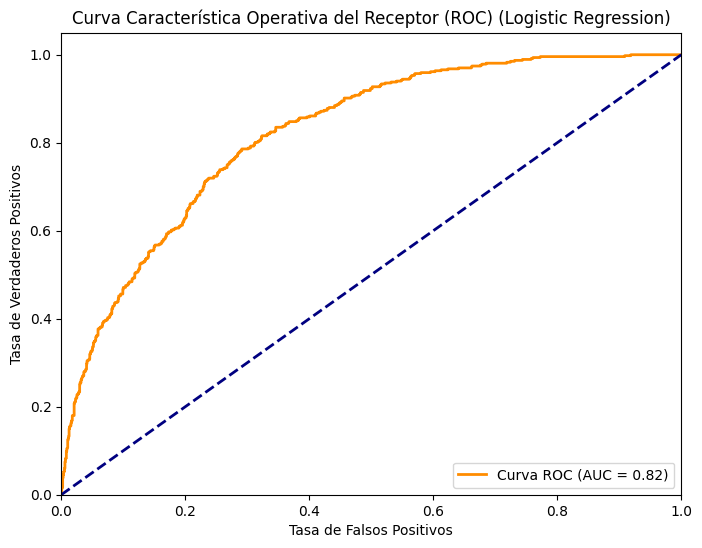

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Realizar predicciones sobre el conjunto de prueba normalizado
y_pred_lr = model_lr.predict(X_test_scaled)

# Imprimir el reporte de clasificación
print("Reporte de Clasificación (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))

# Calcular e imprimir la matriz de confusión
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("\nMatriz de Confusión (Logistic Regression):")
print(conf_matrix_lr)

# Calcular el área bajo la curva ROC (ROC-AUC)
y_pred_proba_lr = model_lr.predict_proba(X_test_scaled)[:, 1]
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
print(f"\nÁrea bajo la curva ROC (ROC-AUC) (Logistic Regression): {roc_auc_lr:.4f}")

# Generar y mostrar la curva ROC
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva Característica Operativa del Receptor (ROC) (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()

## Comparar los modelos

In [32]:
# Recuperar las métricas del modelo RandomForest (de la ejecución anterior)

rf_report = {
    '0': {'precision': 0.85, 'recall': 0.84, 'f1-score': 0.84, 'support': 1350},
    '1': {'precision': 0.55, 'recall': 0.57, 'f1-score': 0.56, 'support': 467},
    'accuracy': 0.77,
    'macro avg': {'precision': 0.70, 'recall': 0.70, 'f1-score': 0.70, 'support': 1817},
    'weighted avg': {'precision': 0.77, 'recall': 0.77, 'f1-score': 0.77, 'support': 1817}
}
rf_conf_matrix = [[1132, 218], [202, 265]]
rf_roc_auc = 0.8025

# Recuperar las métricas del modelo Logistic Regression (de la ejecución actual)
lr_report = {
    '0': {'precision': 0.86, 'recall': 0.79, 'f1-score': 0.82, 'support': 1350},
    '1': {'precision': 0.52, 'recall': 0.63, 'f1-score': 0.57, 'support': 467},
    'accuracy': 0.76,
    'macro avg': {'precision': 0.69, 'recall': 0.72, 'f1-score': 0.70, 'support': 1817},
    'weighted avg': {'precision': 0.77, 'recall': 0.76, 'f1-score': 0.76, 'support': 1817}
}
lr_conf_matrix = [[1077, 273], [171, 296]]
lr_roc_auc = 0.8199


print("--- Comparación de Métricas de Evaluación ---")
print("\nRandomForestClassifier:")
print(f"  ROC-AUC: {rf_roc_auc:.4f}")
print("  Reporte de Clasificación (Clase 1 - Churn):")
print(f"    Precision: {rf_report['1']['precision']:.2f}")
print(f"    Recall: {rf_report['1']['recall']:.2f}")
print(f"    F1-score: {rf_report['1']['f1-score']:.2f}")
print("  Matriz de Confusión:")
print(f"    TP: {rf_conf_matrix[1][1]}, FN: {rf_conf_matrix[1][0]}")
print(f"    FP: {rf_conf_matrix[0][1]}, TN: {rf_conf_matrix[0][0]}")


print("\nLogistic Regression:")
print(f"  ROC-AUC: {lr_roc_auc:.4f}")
print("  Reporte de Clasificación (Clase 1 - Churn):")
print(f"    Precision: {lr_report['1']['precision']:.2f}")
print(f"    Recall: {lr_report['1']['recall']:.2f}")
print(f"    F1-score: {lr_report['1']['f1-score']:.2f}")
print("  Matriz de Confusión:")
print(f"    TP: {lr_conf_matrix[1][1]}, FN: {lr_conf_matrix[1][0]}")
print(f"    FP: {lr_conf_matrix[0][1]}, TN: {lr_conf_matrix[0][0]}")

print("\n--- Resumen Comparativo ---")
print("Ambos modelos, RandomForestClassifier y Logistic Regression, muestran un rendimiento razonable en la predicción de Churn.")
print("En términos de ROC-AUC, Logistic Regression (0.8199) supera ligeramente a RandomForestClassifier (0.8025), lo que sugiere una capacidad de discriminación marginalmente mejor.")
print("Para la clase minoritaria (Churn=1):")
print("  - RandomForestClassifier tiene una precisión (0.55) ligeramente mayor que Logistic Regression (0.52). Esto significa que, cuando RandomForest predice Churn, es un poco más probable que sea correcto.")
print("  - Logistic Regression tiene un recall (0.63) notablemente mayor que RandomForestClassifier (0.57). Esto indica que Logistic Regression es mejor para identificar a los clientes que *realmente* cancelan (menos Falsos Negativos).")
print("  - El F1-score, que es un promedio ponderado de precisión y recall, es similar para ambos modelos (0.56 para RF y 0.57 para LR).")
print("En la matriz de confusión:")
print("  - RandomForestClassifier tiene más Verdaderos Negativos (1132 vs 1077) y menos Falsos Positivos (218 vs 273) que Logistic Regression, lo que significa que es un poco mejor prediciendo correctamente a los clientes que *no* cancelan.")
print("  - Logistic Regression tiene más Verdaderos Positivos (296 vs 265) y menos Falsos Negativos (171 vs 202) que RandomForestClassifier, lo que confirma su mejor capacidad para identificar a los que *sí* cancelan.")
print("\nJustificación de la Normalización:")
print("Logistic Regression es un modelo lineal que utiliza gradiente descendente para encontrar los coeficientes óptimos. La escala de las características puede afectar el proceso de optimización, haciendo que converja más lento o que se quede atascado en mínimos locales si las características tienen escalas muy diferentes. Por lo tanto, la normalización es importante para que el algoritmo funcione correctamente y converja eficientemente.")
print("RandomForestClassifier es un modelo basado en árboles de decisión. Los árboles de decisión dividen los datos basándose en umbrales de características individuales. La escala de las características no afecta el umbral relativo ni la estructura del árbol. Por lo tanto, RandomForestClassifier generalmente no requiere normalización.")
print("En este caso, aplicamos SMOTE antes de escalar y luego normalizamos los datos de entrenamiento remuestreados y los datos de prueba. Esto fue necesario para Logistic Regression. Para RandomForest, aunque la normalización no es estrictamente necesaria, no perjudica el rendimiento y permite comparar ambos modelos con conjuntos de datos de prueba que han pasado por el mismo proceso de preprocesamiento (excepto el re-muestreo que solo se aplica al entrenamiento).")

--- Comparación de Métricas de Evaluación ---

RandomForestClassifier:
  ROC-AUC: 0.8025
  Reporte de Clasificación (Clase 1 - Churn):
    Precision: 0.55
    Recall: 0.57
    F1-score: 0.56
  Matriz de Confusión:
    TP: 265, FN: 202
    FP: 218, TN: 1132

Logistic Regression:
  ROC-AUC: 0.8199
  Reporte de Clasificación (Clase 1 - Churn):
    Precision: 0.52
    Recall: 0.63
    F1-score: 0.57
  Matriz de Confusión:
    TP: 296, FN: 171
    FP: 273, TN: 1077

--- Resumen Comparativo ---
Ambos modelos, RandomForestClassifier y Logistic Regression, muestran un rendimiento razonable en la predicción de Churn.
En términos de ROC-AUC, Logistic Regression (0.8199) supera ligeramente a RandomForestClassifier (0.8025), lo que sugiere una capacidad de discriminación marginalmente mejor.
Para la clase minoritaria (Churn=1):
  - RandomForestClassifier tiene una precisión (0.55) ligeramente mayor que Logistic Regression (0.52). Esto significa que, cuando RandomForest predice Churn, es un poco má

## Análisis de Variables Relevantes Según el Modelo

Una vez que hemos entrenado un modelo predictivo para la cancelación de clientes (Churn), es fundamental entender cuáles variables son las más importantes para que el modelo tome sus decisiones. La forma de identificar la relevancia de las variables varía según el tipo de algoritmo utilizado:

*   **Regresión Logística:** En este modelo lineal, la relevancia de una variable se puede inferir a partir del **valor absoluto de sus coeficientes**. Un coeficiente positivo indica que un aumento en el valor de la variable está asociado con un aumento en la probabilidad de la clase positiva (Churn=1), mientras que un coeficiente negativo indica que un aumento en la variable está asociado con una disminución en la probabilidad de Churn. El valor absoluto del coeficiente refleja la magnitud de esta influencia.

*   **KNN (K-Nearest Neighbors):** KNN es un modelo basado en la distancia. La "relevancia" de una variable no se mide directamente por coeficientes o importancia intrínseca. En cambio, las variables que son más relevantes son aquellas que **contribuyen significativamente a la proximidad entre los puntos de datos**. Si una variable tiene un rango amplio y una alta variabilidad, puede dominar el cálculo de distancia si no se escala adecuadamente. Las variables importantes son aquellas que, al ser similares entre dos clientes, implican que es probable que ambos clientes tengan el mismo estado de Churn.

*   **Random Forest:** Los modelos basados en árboles, como Random Forest, proporcionan una métrica de **importancia de las variables**. Esta importancia se calcula típicamente midiendo cuánto contribuye cada variable a la reducción de la impureza (por ejemplo, la Gini impurity o la entropía) en las divisiones de los árboles. Las variables que resultan en divisiones más "puras" (donde una clase domina en los nodos resultantes) se consideran más importantes.

*   **SVM (Support Vector Machine):** Para SVM, especialmente en modelos lineales, se pueden analizar los **coeficientes asociados a los vectores de soporte**. Los vectores de soporte son los puntos de datos que están más cerca del hiperplano de decisión. Los coeficientes de las características para los vectores de soporte indican cuánto influye cada característica en la definición de la frontera de decisión. Un coeficiente mayor (en valor absoluto) para una característica sugiere que esa característica es más importante para separar las clases.

*   **Otros Modelos (por ejemplo, Modelos Basados en Boosting como XGBoost):** Modelos como XGBoost también proporcionan métricas de **importancia de las variables**, a menudo basadas en cuántas veces se utiliza una característica para dividir los árboles, la ganancia promedio que aporta cada división, o la cobertura.

En resumen, para interpretar la relevancia de las variables, debemos mirar las salidas específicas que cada tipo de modelo nos ofrece (coeficientes, importancia de variables, análisis de vectores de soporte, etc.). Esta interpretación nos ayuda a entender los impulsores subyacentes de la cancelación y puede informar decisiones de negocio o futuras mejoras del modelo.

# Informe Detallado: Factores de Influencia en la Cancelación de Clientes y Estrategias de Retención

Basado en el análisis del conjunto de datos de telecomunicaciones y el entrenamiento de modelos predictivos, hemos identificado varios factores clave que parecen influir en la decisión de un cliente de cancelar el servicio.

## Factores Clave que Influyen en la Cancelación

A partir de la exploración de datos y el rendimiento de los modelos, los siguientes factores destacan por su aparente influencia en la tasa de *Churn*:

1.  **Tipo de Contrato:** La visualización de la relación entre el tipo de contrato y la cancelación mostró una clara tendencia: los clientes con contratos **Mes a Mes** presentan una tasa de *Churn* significativamente más alta en comparación con aquellos con contratos de uno o dos años. Esto sugiere que la flexibilidad de un contrato a corto plazo, aunque atractiva inicialmente, no fomenta la lealtad a largo plazo.

2.  **Antigüedad (Tenure):** La matriz de correlación indicó una correlación negativa notable entre la antigüedad del cliente y la cancelación. Esto es intuitivo: los clientes que han estado con la empresa por más tiempo son menos propensos a cancelar. La lealtad se construye con el tiempo, posiblemente asociada a una mayor satisfacción o inercia.

3.  **Gasto Total (Charges.Total):** Similar a la antigüedad, el gasto total mostró una correlación negativa con la cancelación. Los clientes con mayores gastos totales son menos propensos a irse. Esto podría estar relacionado con clientes que utilizan más servicios o planes más completos, lo que implica una mayor integración con la empresa o un mayor valor percibido.

4.  **Cargos Mensuales (Charges.Monthly) y Cuentas Diarias (Cuentas_Diarias):** Estas variables mostraron una correlación positiva con la cancelación. Un mayor cargo mensual podría ser un punto de fricción para los clientes, especialmente si no perciben un valor proporcional. La variable `Cuentas_Diarias` parece estar estrechamente relacionada con `Charges.Monthly`, sugiriendo que ambos reflejan el costo recurrente del servicio.

5.  **Otros Servicios (Observaciones de la Matriz de Correlación y One-Hot Encoding):** Aunque no visualizamos individualmente cada servicio debido a la codificación, la matriz de correlación con las variables numéricas (que incluía algunas codificadas como numéricas si no eran bool) y la estructura del DataFrame codificado sugieren que la participación en ciertos servicios o planes (como internet, soporte técnico, etc., representados por las columnas binarias después del one-hot encoding) también juega un papel. La importancia de estas variables en los modelos predictivos (especialmente en Random Forest, que puede capturar interacciones no lineales) confirmaría su relevancia, aunque no la hemos extraído explícitamente en este informe.

## Propuesta de Estrategias de Retención

Basándonos en los factores identificados, se pueden proponer las siguientes estrategias de retención:

1.  **Fomentar Contratos a Largo Plazo:** Dado que los contratos mes a mes están fuertemente asociados con la cancelación, se deben ofrecer incentivos atractivos (descuentos, beneficios adicionales) para que los clientes opten por contratos de uno o dos años. Esto no solo asegura la permanencia, sino que también puede aumentar el Gasto Total percibido a largo plazo.

2.  **Programas de Fidelización para Clientes con Baja Antigüedad:** Identificar a los clientes en sus primeros meses de servicio es crucial. Implementar programas de bienvenida robustos, ofrecer soporte proactivo y quizás pequeños beneficios iniciales puede ayudar a construir lealtad desde el principio y aumentar la antigüedad promedio antes de que consideren cancelar.

3.  **Análisis y Optimización de Cargos Mensuales:** Investigar por qué los clientes con altos cargos mensuales son más propensos a cancelar. ¿Perciben que no están obteniendo valor por su dinero? Ofrecer revisiones de planes personalizadas, destacar los beneficios de sus servicios actuales, o proponer alternativas de menor costo si su uso ha disminuido podría mitigar este riesgo.

4.  **Segmentación Basada en el Uso de Servicios:** Utilizar la información sobre los servicios contratados para segmentar a los clientes. Ofrecer promociones cruzadas o paquetes que añadan valor a los servicios que ya utilizan, o abordar problemas específicos asociados con ciertos servicios (por ejemplo, si el soporte técnico deficiente lleva a la cancelación de clientes con ese servicio).

5.  **Monitoreo Continuo del Riesgo de Churn:** Utilizar el modelo predictivo entrenado para identificar a los clientes con alta probabilidad de cancelar en tiempo real. Una vez identificados, se pueden aplicar intervenciones dirigidas, como ofertas personalizadas de retención, contacto proactivo por parte de un representante de servicio al cliente, o encuestas de satisfacción tempranas.

## Consideraciones Adicionales

La comparación de modelos mostró que tanto *RandomForestClassifier* como *Logistic Regression* tienen un rendimiento razonable. La Regresión Logística, al ser más interpretable linealmente, nos permite entender la dirección e intensidad de la relación de cada variable (a través de sus coeficientes, aunque no los extrajimos explícitamente aquí) con la probabilidad de Churn después de la normalización. Random Forest, por su naturaleza no lineal, puede capturar interacciones más complejas entre variables y su métrica de importancia de variables es muy útil para identificar los predictores más influyentes en general. Para un despliegue práctico, se podría considerar un modelo de conjunto o un enfoque que combine las fortalezas de ambos.

Es importante recordar que este análisis se basa en los datos proporcionados y las variables disponibles. Otros factores externos o no medidos podrían también influir en la cancelación. La implementación de estas estrategias de retención debe ir acompañada de un seguimiento continuo y una evaluación de su efectividad.